# KUALA LUMPUR SCHOOL OF ARTIFICIAL INTELLIGENCE, FEBRUARY 2019
## SENTIMENT ANALYSIS BY PURNIMA WIJENDRA

###Sentiment Analysis & Visualisation

 
OUTLINE
- Introduction 
- Scraping Social Media - Twitter
- Cleaning data
- Applying Sentiment Polarity
- Visualisation 
- Word Cloud


In [ ]:
#!pip install tweepy

In [ ]:
#!pip install --upgrade pip

In [2]:
import tweepy
from tweepy import OAuthHandler
import csv
import pandas as pd

#insert all the tokens

#auth =
#auth.set_access_token
#api

#public_tweets

#auth to replace consumer key into the methods
#public tweet = fried chicken
# want to see what the millenials see about the fried chicken

In [3]:
#!pip install textblob

In [4]:
#Importing libraries
import csv
import pandas as pd
import numpy as np
import re
from textblob import TextBlob

In [5]:
!pwd

/Users/Sulaiman/Desktop/Data Science 3/KLSAI_3-Sentiment Analysis


In [6]:
#Importing Dataset

data = pd.read_csv("/Users/Sulaiman/Desktop/Data Science 3/KLSAI_3-Sentiment Analysis/friedchick.csv")




In [7]:
data.head()

,date,tweet
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...
1,15/02/2019 9:13,"b""RT @skizyman: I still can't believe there wa..."
2,15/02/2019 9:13,b'RT @DanneelHarris: Happy Valentine Day to my...
3,15/02/2019 9:11,b'KFC Has A Fried Chicken Sandwich With Mac &a...
4,15/02/2019 9:10,"b""RT @skizyman: I still can't believe there wa..."


In [8]:
data.describe()

,date,tweet
count,16606,16606
unique,4700,9315
top,14/02/2019 19:04,"b'RT @ItsFoodPorn: Fried Chicken, Fries &amp; ..."
freq,27,710


In [9]:
#Sentiment Analysis

def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

data['sentiment'] = data['tweet'].apply(sentiment_calc)

In [10]:
data.head()

,date,tweet,sentiment
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...,"(-0.3, 0.475)"
1,15/02/2019 9:13,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)"
2,15/02/2019 9:13,b'RT @DanneelHarris: Happy Valentine Day to my...,"(0.325, 0.5305555555555554)"
3,15/02/2019 9:11,b'KFC Has A Fried Chicken Sandwich With Mac &a...,"(-0.6, 0.95)"
4,15/02/2019 9:10,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)"


In [11]:
data.iloc[:1]

,date,tweet,sentiment
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...,"(-0.3, 0.475)"


In [12]:
#Cleaning & Analysis Tweets & Sentiments

def clean_tweet(tweet):
    '''
    to clean the text by removing links and special characters using regex
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",tweet).split())

def analize_sentiment(tweet):
    '''
    to classify the polarity of the tweet
    '''
    (re.sub)
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [13]:
data.head()

,date,tweet,sentiment
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...,"(-0.3, 0.475)"
1,15/02/2019 9:13,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)"
2,15/02/2019 9:13,b'RT @DanneelHarris: Happy Valentine Day to my...,"(0.325, 0.5305555555555554)"
3,15/02/2019 9:11,b'KFC Has A Fried Chicken Sandwich With Mac &a...,"(-0.6, 0.95)"
4,15/02/2019 9:10,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)"


In [14]:
data['SA'] = np.array([analize_sentiment(text) for text in data['tweet']])
display(data.head(10))

,date,tweet,sentiment,SA
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...,"(-0.3, 0.475)",-1
1,15/02/2019 9:13,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
2,15/02/2019 9:13,b'RT @DanneelHarris: Happy Valentine Day to my...,"(0.325, 0.5305555555555554)",1
3,15/02/2019 9:11,b'KFC Has A Fried Chicken Sandwich With Mac &a...,"(-0.6, 0.95)",-1
4,15/02/2019 9:10,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
5,15/02/2019 9:10,"b""f09f8d94TODAY'S BURGER OF THE DAY is our Fla...","(-0.3, 0.475)",-1
6,15/02/2019 9:10,b'RT @DanneelHarris: Happy Valentine Day to my...,"(0.325, 0.5305555555555554)",1
7,15/02/2019 9:08,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
8,15/02/2019 9:08,b'RT @d0nghues: #ikonicselcaday our faces when...,"(0.0, 0.0)",0
9,15/02/2019 9:07,"b'RT @ItsFoodPorn: Fried Chicken, Fries &amp; ...","(-0.6, 0.95)",-1


In [15]:
mean = np.mean(data['SA'])
print ("The sentiments average in tweets: {}".format(mean))

The sentiments average in tweets: -0.6056244730820185


In [16]:
#Breakdown of Sentiment

pos_tweets = [tweet for index, tweet in enumerate(data['tweet'])
             if data['SA'][index] > 0]

neu_tweets = [tweet for index, tweet in enumerate(data['tweet'])
             if data['SA'][index] == 0]

neg_tweets = [tweet for index, tweet in enumerate(data['tweet'])
             if data['SA'][index] < 0]
             

In [17]:
per_pos = len(pos_tweets)*100/len(data['tweet'])
per_neu = len(neu_tweets)*100/len(data['tweet'])
per_neg = len(neg_tweets)*100/len(data['tweet'])

In [18]:
print(per_pos)
print(per_neu)
print(per_neg)

15.958087438275323
7.521377815247501
76.52053474647718


In [19]:
#Visualisation

import matplotlib.pyplot as plt

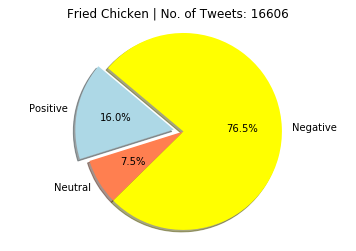

In [20]:
#Select data to plot

labels = 'Positive', 'Neutral', 'Negative'
sizes = [per_pos, per_neu, per_neg]
colors = ['lightblue', 'coral', 'yellow']
explode = (0.1, 0, 0) #explode 1st slice

#Plot

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Fried Chicken | No. of Tweets: 16606')
plt.axis('equal')
plt.show()


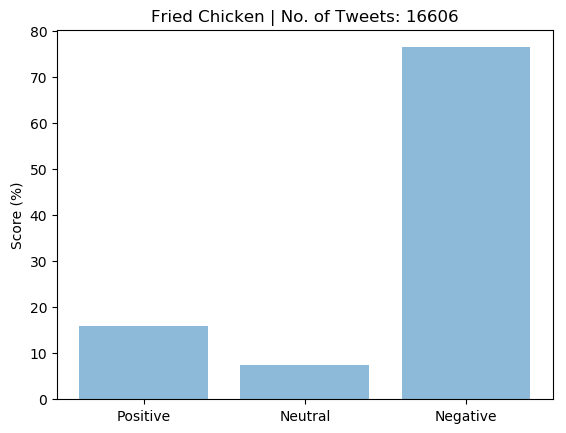

In [21]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('Positive', 'Neutral', 'Negative')
y_pos = np.arange(len(objects))
performance = [per_pos, per_neu, per_neg]

plt.bar(objects, performance, align = 'center', alpha = 0.5)
plt.xticks(objects,objects)
plt.ylabel('Score (%)')
plt.title('Fried Chicken | No. of Tweets: 16606')
plt.show()

In [22]:
#Generate wordcloud

In [30]:
# !pip install wordcloud

In [31]:
# !pip install pillow

In [32]:
from wordcloud import WordCloud

In [33]:
data_wc = " ".join(text for text in data.tweet)
print ("There are {} words in the combination of all review.".format(len(data_wc)))

There are 1954301 words in the combination of all review.


In [34]:
wordcloud2 = WordCloud(background_color='white').generate(data_wc)

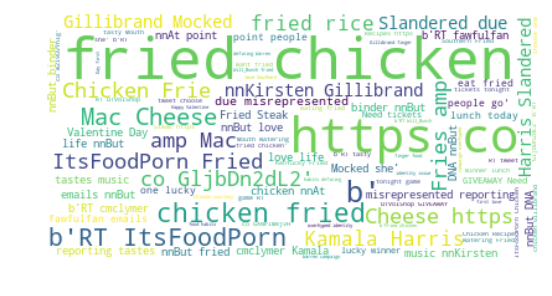

In [35]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
#Negative Word Cloud

newc = data.loc[data['SA'] == -1]
neText = " ".join(tweet for tweet in newc.tweet)
print ("There are {} words in the combination of all tweets".format(len(neText)))

There are 1444579 words in the combination of all tweets


In [37]:
wordcloud_ne = WordCloud(background_color='black').generate(neText)

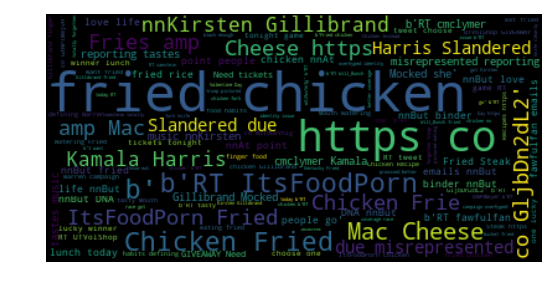

In [38]:
plt.imshow(wordcloud_ne, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
#Positive Word Cloud

powc = data.loc[data['SA'] == 1]
poText = " ".join(tweet for tweet in powc.tweet)
print ("There are {} words in the combination of all tweets".format(len(poText)))

There are 346559 words in the combination of all tweets


In [40]:
wordcloud_po = WordCloud(background_color='pink').generate(poText)

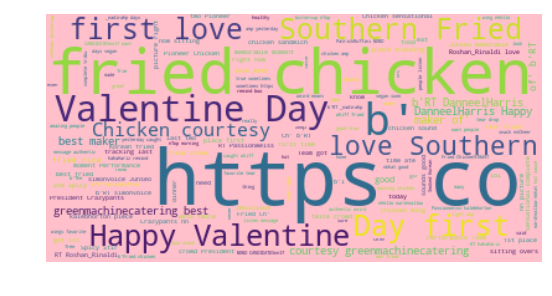

In [41]:
plt.imshow(wordcloud_po, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
#Neutral Word Cloud

There are 346559 words in the combination of all tweets


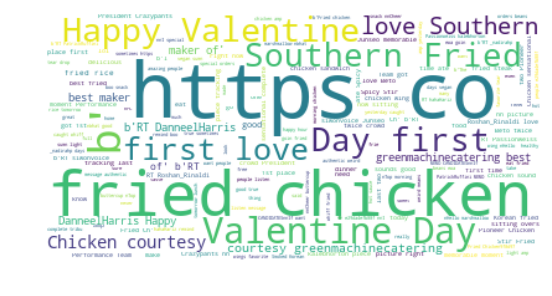

In [43]:
neuc = data.loc[data['SA'] == 1]
neuText = " ".join(tweet for tweet in neuc.tweet)
print ("There are {} words in the combination of all tweets".format(len(neuText)))

wordcloud_neu = WordCloud(background_color='white').generate(neuText)

plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis("off")
plt.show()